In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# DATASET 1 

In [ ]:
# dataset 1 

#%%
'''import libraries'''
import pandas as pd
import numpy as np
from service import *

#%%
'''baca file'''  
data_bank=pd.read_csv(r"/home/yusuf/hyperparameter-tuning-benchmark/Data_Preprocessing/dataset-raw/bank-full.csv",sep=';')
data_bank.info()

#%%
'''hapus kolom duration'''
data_bank=data_bank.drop(['duration'],axis=1)
# berdasarkan https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, disarankan duration dihapus 

#%% 
'''banyak nilai kategori di tiap fitur kategorikal''' 
# banyak_tiap_kategori(data_bank)

#%% 
'''ubah nilai unknown menjadi nilai yang paling sering muncul'''
data_bank['job']=data_bank['job'].replace(['unknown'],'blue-collar')
data_bank['education']=data_bank['education'].replace(['unknown'],'secondary')
data_bank['contact']=data_bank['contact'].replace(['unknown'],'cellular')

#%%
'''hapus kolom poutcome'''
data_bank=data_bank.drop(['poutcome'],axis=1)

#%%
'''pengelompokan nilai kategori pada fitur job'''
data_bank['job']=data_bank['job'].replace(['management','entrepreneur'],'high')
data_bank['job']=data_bank['job'].replace(['blue-collar','technician','services','self-employed'],'mid')
data_bank['job']=data_bank['job'].replace(['unemployed','housemaid','student','admin.','retired'],'low')

'''pengelompokan nilai kategori pada fitur month'''
data_bank['month']=data_bank['month'].replace(['jan','feb','mar','apr','may','jun'],'semester-1')
data_bank['month']=data_bank['month'].replace(['jul','aug','sep','oct','nov','dec'],'semester-2')

#%%
## untuk catboost ini tidak perlu dilakukan...
'''label encoding pada fitur education'''
kategori=['primary','secondary','tertiary']
label=[1,2,3]
data_bank['education']=data_bank['education'].replace(kategori,label)

#%%
'''dimensi data sebelum transformasi'''
X,y=pisah_x_y(data_bank)
# print("before transform")
# print("y= ",y.shape)
# print("X= ",X.shape)
#%%
'''transformasi data'''
numerical_minmax=['age','balance','day','campaign','pdays','previous']
categorical_onehot=['job','marital','default','housing','loan','contact','month']
y=transform_kelas(y)
X=transform_fitur(X,numerical_minmax,categorical_onehot) # xgboost dan lightgbm


#%%
# print("dimensi data setelah transformasi")
# print("y= ",y.shape)
# print("X= ",X.shape)

#%%
'''export data'''
#ekspor_data(X,y,"X-bank","y-bank")



In [ ]:
# 

In [194]:
data=pd.read_csv(r"/home/yusuf/hyperparameter-tuning-benchmark/Data_Preprocessing/dataset-raw/cus_seg.csv")

## EDA

In [195]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [196]:
data.size

88748

In [197]:

print(data['Segmentation'].unique())

['D' 'A' 'B' 'C']


In [198]:
print(data['Segmentation'].value_counts())

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


In [199]:
A=(data['Segmentation']=='A').sum()
B=(data['Segmentation']=='B').sum()
C=(data['Segmentation']=='C').sum()
D=(data['Segmentation']=='D').sum()

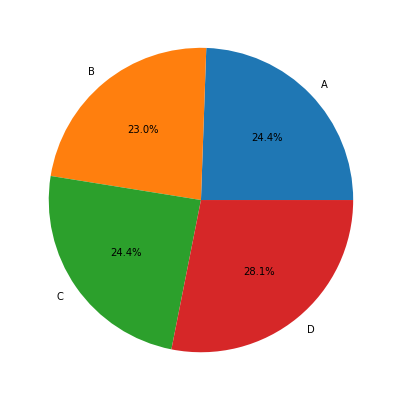

In [200]:
y=np.array([A,B,C,D])
mylabels=["A","B","C","D"]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(y,labels=mylabels,autopct='%1.1f%%')
plt.show()

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


In [202]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [203]:
# feature column, ID dan segmentation bukan feature 
feature_cols=data.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1']

In [204]:
# ada 9 fitur dan dari 9 fitur ada 6 fitur yang memiliki nilai NaN

# Handle Missing Values

## 1. Ever_Married

In [205]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Ever_Married"].unique(),"\n")
print(data['Ever_Married'].value_counts(),"\n")
print("jumlah NaN values= ",data['Ever_Married'].isna().sum(),"\n")
data['Ever_Married']=data['Ever_Married'].fillna('Yes')
print(data['Ever_Married'].value_counts(),"\n")

Nilai unik=  ['No' 'Yes' nan] 

Yes    4643
No     3285
Name: Ever_Married, dtype: int64 

jumlah NaN values=  140 

Yes    4783
No     3285
Name: Ever_Married, dtype: int64 



## 2. Graduated

In [206]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Graduated"].unique(),"\n")
print(data['Graduated'].value_counts(),"\n")
print("jumlah NaN values= ",data['Graduated'].isna().sum(),"\n")
data['Graduated']=data['Graduated'].fillna('Yes')
print(data['Graduated'].value_counts(),"\n")

Nilai unik=  ['No' 'Yes' nan] 

Yes    4968
No     3022
Name: Graduated, dtype: int64 

jumlah NaN values=  78 

Yes    5046
No     3022
Name: Graduated, dtype: int64 



## 3. Profession

In [207]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Profession"].unique(),"\n")
print(data['Profession'].value_counts(),"\n")
print("jumlah NaN values= ",data['Profession'].isna().sum(),"\n")
data['Profession']=data['Profession'].fillna('Artist')
print(data['Profession'].value_counts(),"\n")

Nilai unik=  ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan] 

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64 

jumlah NaN values=  124 

Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64 



## 4. Work Experience

In [208]:
# ubah nilai NaN jadi nilai rata2nya 
kolom='Work_Experience'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")

Nilai unik=  [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.] 

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64 



In [209]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

jumlah NaN values=  829 



In [210]:
rata_rata=round(data[kolom].mean(),1)
print("nilai rata-rata= ", rata_rata,"\n")
data[kolom]=data[kolom].fillna(rata_rata)
print(data[kolom].value_counts(),"\n")

nilai rata-rata=  2.6 

1.0     2354
0.0     2318
2.6      829
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64 



## 5. Family Size 

In [211]:
# ubah nilai NaN jadi nilai rata2nya 
kolom='Family_Size'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")


Nilai unik=  [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.] 

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64 



In [212]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

jumlah NaN values=  335 



In [213]:
rata_rata=round(data[kolom].mean(),1)
print("nilai rata-rata= ", rata_rata,"\n")
data[kolom]=data[kolom].fillna(rata_rata)
print(data[kolom].value_counts(),"\n")

nilai rata-rata=  2.9 

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
2.9     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64 



## 6. Var_1

In [214]:
# ubah NaN jadi nilai yang most frequent  
kolom='Var_1'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")

Nilai unik=  ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5'] 

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64 



In [215]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

jumlah NaN values=  76 



In [216]:
data[kolom]=data[kolom].fillna('Cat_6')
print(data[kolom].value_counts(),"\n")

Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64 



In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null object
Age                8068 non-null int64
Graduated          8068 non-null object
Profession         8068 non-null object
Work_Experience    8068 non-null float64
Spending_Score     8068 non-null object
Family_Size        8068 non-null float64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


# Normalization and Encoding

In [218]:
# untuk data numerical = min max scaler 
# untuk data kategorikal = label and one hot encoding 
# khusus untuk catboost = gk perlu one hot encoding, biarkan apa adanya, gk perlu diubah jadi numerikal jg 

In [219]:
df_fitur=data.drop(columns=['ID', 'Segmentation'])
df_kelas=data[['Segmentation']]

In [220]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
Gender             8068 non-null object
Ever_Married       8068 non-null object
Age                8068 non-null int64
Graduated          8068 non-null object
Profession         8068 non-null object
Work_Experience    8068 non-null float64
Spending_Score     8068 non-null object
Family_Size        8068 non-null float64
Var_1              8068 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [221]:
df_kelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 1 columns):
Segmentation    8068 non-null object
dtypes: object(1)
memory usage: 63.1+ KB


In [222]:
y=LabelEncoder().fit_transform(df_kelas)

In [223]:
y

array([3, 0, 1, ..., 3, 1, 1])

In [224]:
# hitung banyak kategori tiap fitur kategorikal 
categorical_ix = df_fitur.select_dtypes(include=['object']).columns 
sum=0
for i in categorical_ix:
    print(i,"=",len(df_fitur[i].unique())," kategori")
    sum=sum+len(df_fitur[i].unique())
print("\ntotal kategori= ",sum)

Gender = 2  kategori
Ever_Married = 2  kategori
Graduated = 2  kategori
Profession = 9  kategori
Spending_Score = 3  kategori
Var_1 = 7  kategori

total kategori=  25


In [225]:
# cek 
df_fitur['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [226]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
Gender             8068 non-null object
Ever_Married       8068 non-null object
Age                8068 non-null int64
Graduated          8068 non-null object
Profession         8068 non-null object
Work_Experience    8068 non-null float64
Spending_Score     8068 non-null object
Family_Size        8068 non-null float64
Var_1              8068 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [227]:
categorical_onehot=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]
numerical_col=["Age","Work_Experience","Family_Size"]

t = [('cat', OneHotEncoder(sparse=False), categorical_onehot),('num', MinMaxScaler(), numerical_col)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
X=col_transform.fit_transform(df_fitur)

In [228]:
# untuk catboost 
t = [('num', MinMaxScaler(), numerical_col)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
X_catboost=col_transform.fit_transform(df_fitur)

In [229]:
X_catboost.shape

(8068, 9)

In [230]:
X.shape

(8068, 28)

In [231]:
y.shape

(8068,)

# Save File

In [232]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

X.to_csv('dataset-ready/'+'X_cus_seg'+'.csv',index=False,header=None)
y.to_csv('dataset-ready/'+'y_cus_seg'+'.csv',index=False,header=None)

In [233]:
X_catboost=pd.DataFrame(X_catboost)

X_catboost.to_csv('dataset-ready/'+'X_cus_seg_catboost'+'.csv',index=False,header=None)